In [28]:
import numpy as np
np.bool = bool
np.int = int
np.float = float
np.complex = complex
np.object = object
np.str = str

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [10]:
pip install ucimlrepo

     |████████████████████████████████| 159 kB 2.7 MB/s eta 0:00:01
  Attempting uninstall: certifi
    Found existing installation: certifi 2020.6.20
    Uninstalling certifi-2020.6.20:
      Successfully uninstalled certifi-2020.6.20
Note: you may need to restart the kernel to use updated packages.


In [31]:
from ucimlrepo import fetch_ucirepo 
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
# data (as pandas dataframes) 
x = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 
# metadata 
print(breast_cancer_wisconsin_diagnostic.metadata) 
# variable information 
print(breast_cancer_wisconsin_diagnostic.variables) 

{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

In [32]:
data = pd.concat([x, y], axis=1)
print(data.head(100))

    radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
0    17.990     10.38      122.80  1001.0      0.11840       0.27760   
1    20.570     17.77      132.90  1326.0      0.08474       0.07864   
2    19.690     21.25      130.00  1203.0      0.10960       0.15990   
3    11.420     20.38       77.58   386.1      0.14250       0.28390   
4    20.290     14.34      135.10  1297.0      0.10030       0.13280   
..      ...       ...         ...     ...          ...           ...   
95   20.260     23.03      132.40  1264.0      0.09078       0.13130   
96   12.180     17.84       77.79   451.1      0.10450       0.07057   
97    9.787     19.94       62.11   294.5      0.10240       0.05301   
98   11.600     12.84       74.34   412.6      0.08983       0.07525   
99   14.420     19.77       94.48   642.5      0.09752       0.11410   

    concavity1  concave_points1  symmetry1  fractal_dimension1  ...  texture3  \
0     0.300100         0.147100     0.2419            

In [47]:
# Step 1: Load the dataset
data = fetch_ucirepo(id=17)#the id=17 refers to the unique dataset ID in the UCI Machine Learning Repository catalog used by the ucimlrepo Python package.
X = data.data.features
y = data.data.targets['Diagnosis']  # Target column

In [48]:
# Step 2: Encode labels (M/B -> 1/0)
le = LabelEncoder()
y = le.fit_transform(y)  # M=1, B=0

In [86]:
# Step 3: Train/Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=42)

In [87]:
# Step 4: Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [88]:
# Step 5: Train Model (Random Forest)
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [89]:
# Step 6: Make Predictions
y_pred = model.predict(X_test_scaled)

In [90]:
cm=metrics.confusion_matrix(y_test,y_pred)
print(cm)

[[126   3]
 [  4  67]]


In [91]:
score = accuracy_score(y_test, y_pred)
all_sample_title = "Accuracy Score: {:.2f}".format(score)
print(score)

0.965


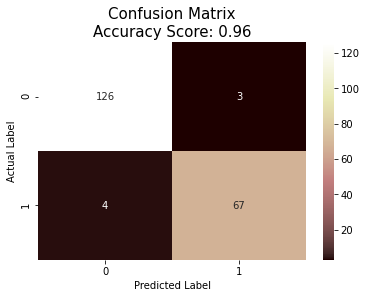

In [92]:
sns.heatmap(cm, annot=True, fmt='d', cmap='pink')
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.title("Confusion Matrix\n" + all_sample_title, size=15)
plt.show()

In [93]:
knn = KNeighborsClassifier(n_neighbors=3)  # you can tune k later
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [94]:
# Step 6: Predict
y_pred = knn.predict(X_test_scaled)

In [95]:
# Step 7: Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.95
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       129
           1       0.93      0.93      0.93        71

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200



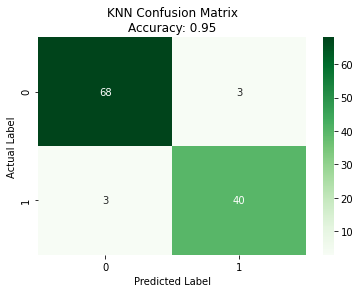

In [80]:
# Step 8: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("KNN Confusion Matrix\nAccuracy: {:.2f}".format(accuracy_score(y_test, y_pred)))
plt.show()